In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format




import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd #Basic library for all of our dataset operations
import numpy as np
import requests
import io
import statsmodels.tsa.api as smt
import statsmodels as sm

from math import sqrt



from statsmodels.tsa.ar_model import AR
from random import random
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams


#Extra settings
seed = 42
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8


In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\siva\\Desktop'

In [4]:
os.chdir('C:\\Users\\siva\\Desktop')

In [5]:
data = pd.read_csv('customers_T.csv')
data.head()

,date,Customers
0,2018-01-01,44
1,2018-01-02,30
2,2018-01-03,38
3,2018-01-04,33
4,2018-01-05,37


In [6]:
data['date'] = pd.to_datetime(data['date'])


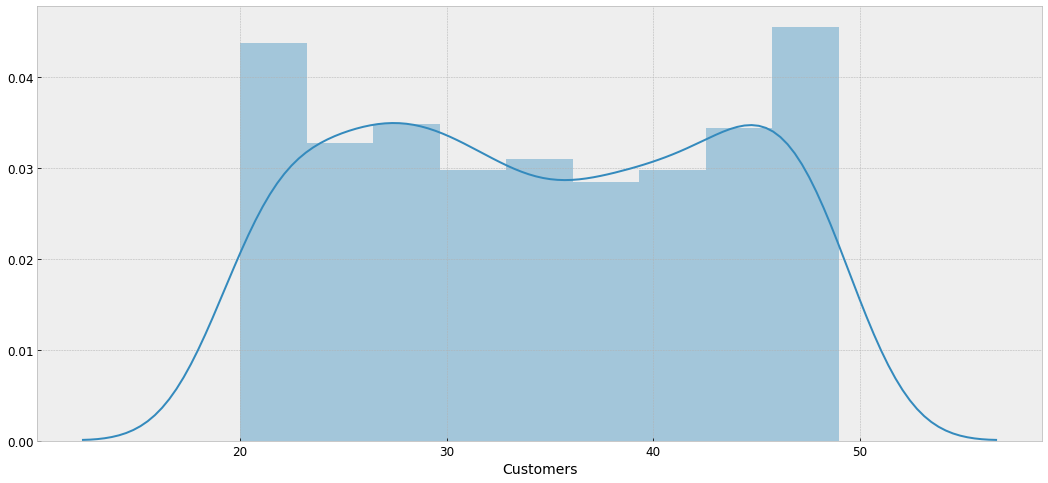

In [7]:
sns.distplot(data['Customers'])

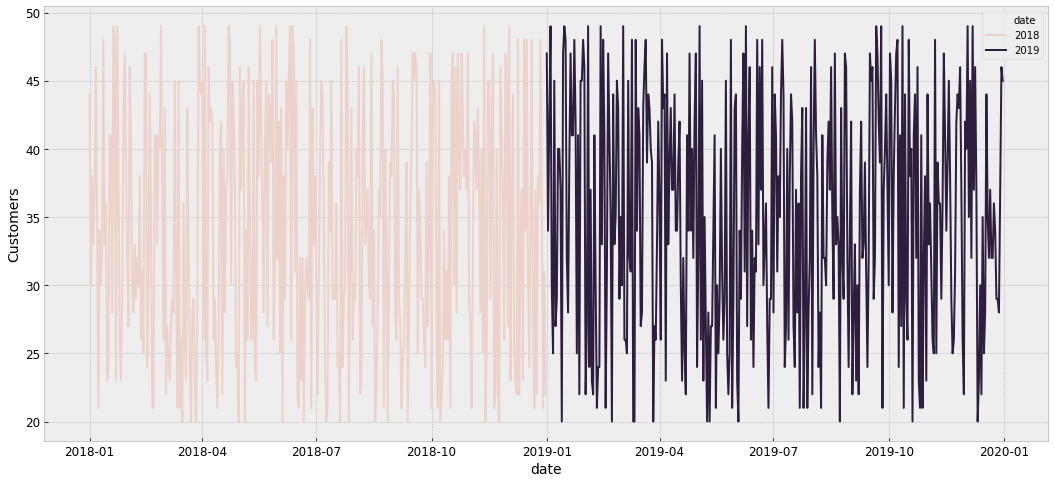

In [8]:
sns.lineplot('date','Customers',hue = data['date'].dt.year,data = data,)

In [9]:
data.set_index('date',inplace=True)

In [10]:
data.shape

(730, 1)

In [11]:
data.isnull().sum()

Customers    0
dtype: int64

In [12]:
from statsmodels.tsa.stattools import adfuller
X = data.Customers
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


ADF Statistic: -26.031963
p-value: 0.000000
Critical Values:


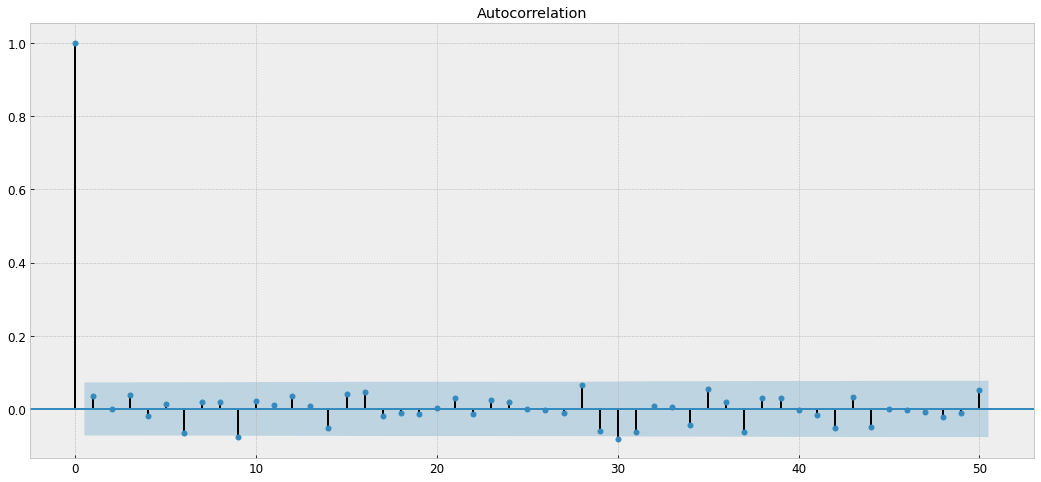

In [13]:
plot_acf(data.Customers, lags=50)
plt.show()


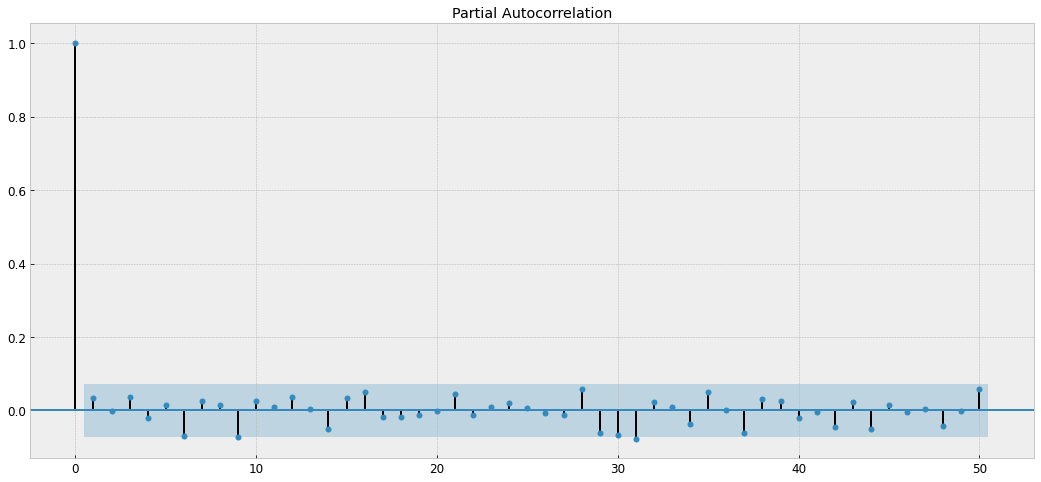

In [14]:
plot_pacf(data.Customers, lags=50)
plt.show()

In [15]:
train=data[:700]
test=data[700:]

In [16]:
test.shape

(30, 1)

In [17]:
from pmdarima.arima import auto_arima

In [18]:
import pmdarima as pm

In [19]:
autoModel = pm.auto_arima(train.Customers, trace=True, error_action='ignore', suppress_warnings=True,seasonal=False)
autoModel.fit(train.Customers)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6991.447, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5514.064, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6410.687, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5345.924, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5255.163, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.20 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.77 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5070.764, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5069.983, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5068.054, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5066.516, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5068.044, Time=0

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [20]:
train['Customers'] = train['Customers'].astype(float)

<ipython-input-20-98454a7a7e7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Customers'] = train['Customers'].astype(float)


In [21]:
order = autoModel.order
yhat = list()
model = ARIMA(train.Customers, order=order)
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=1, end=len(test), dynamic=False)
predictions2 = round(model_fit.predict(start=1, end=len(train), dynamic=False))



C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE train: 9.01245170385316
RMSE of test: 7.818492947671509


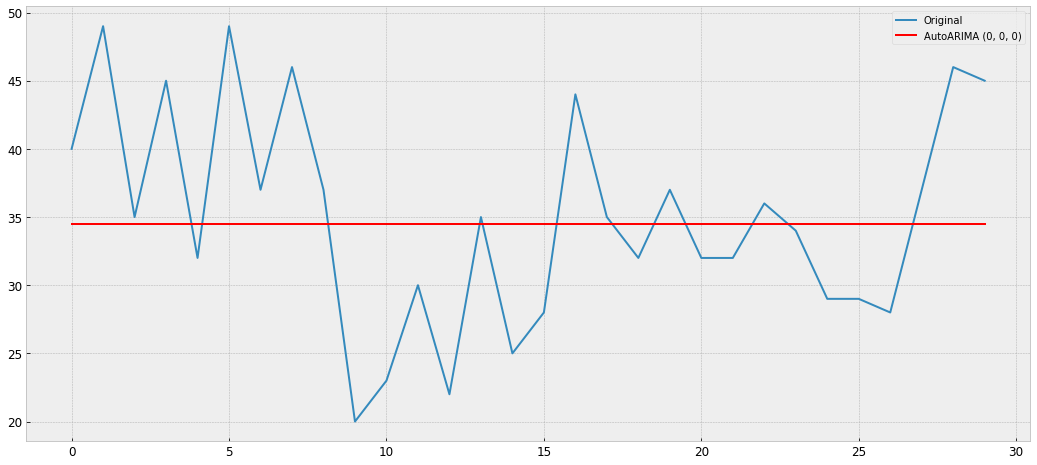

In [24]:
plt.plot(test.Customers.values , label='Original')
plt.plot(predictions.values,color='red',label='AutoARIMA {0}'.format(order))
plt.legend()
print('RMSE train:',np.sqrt(mean_squared_error((train.Customers),predictions2)))

print('RMSE of test:',np.sqrt(mean_squared_error((test.Customers),predictions)))


In [25]:
autoModel = pm.auto_arima(train.Customers, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(train.Customers)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=5066.516, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=5066.060, Time=1.71 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=5066.244, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=6991.447, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[6] intercept   : AIC=5068.054, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[6] intercept   : AIC=5067.684, Time=2.33 sec
 ARIMA(1,0,0)(1,0,1)[6] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,1)[6] intercept   : AIC=5066.262, Time=0.64 sec
 ARIMA(1,0,0)(2,0,1)[6] intercept   : AIC=6403.659, Time=3.70 sec
 ARIMA(0,0,0)(1,0,0)[6] intercept   : AIC=5064.646, Time=1.14 sec
 ARIMA(0,0,0)(2,0,0)[6] intercept   : AIC=5066.251, Time=2.45 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=5067.392, Time=2.17 sec
 ARIMA(0,0,0)(0,0,1)[6] intercept   : AIC=5064.840, Time=0.27 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=in

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 0, 6),
      suppress_warnings=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = autoModel.order
seasonalOrder = autoModel.seasonal_order
model = SARIMAX(train.Customers, order=order, seasonal_order=seasonalOrder)
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=1, end=len(test), dynamic=False)
predictions2 = round(model_fit.predict(start=1, end=len(train), dynamic=False))


   


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RMSE train: 12.78844344376147
RMSE of test: 19.03116369346659


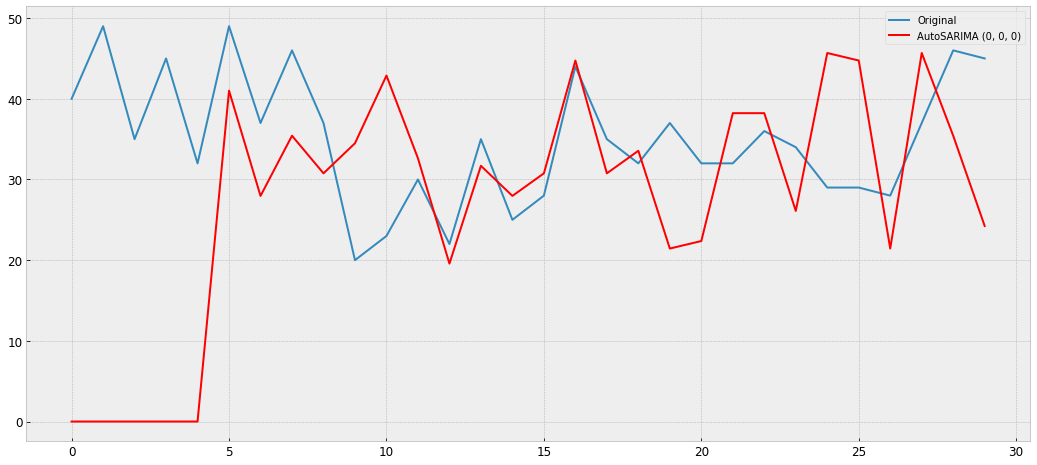

In [27]:
plt.plot(test.Customers.values , label='Original')
plt.plot(predictions.values,color='red',label='AutoSARIMA {0}'.format(order))
plt.legend()
print('RMSE train:',np.sqrt(mean_squared_error((train.Customers),predictions2)))

print('RMSE of test:',np.sqrt(mean_squared_error((test.Customers),predictions)))


In [28]:
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

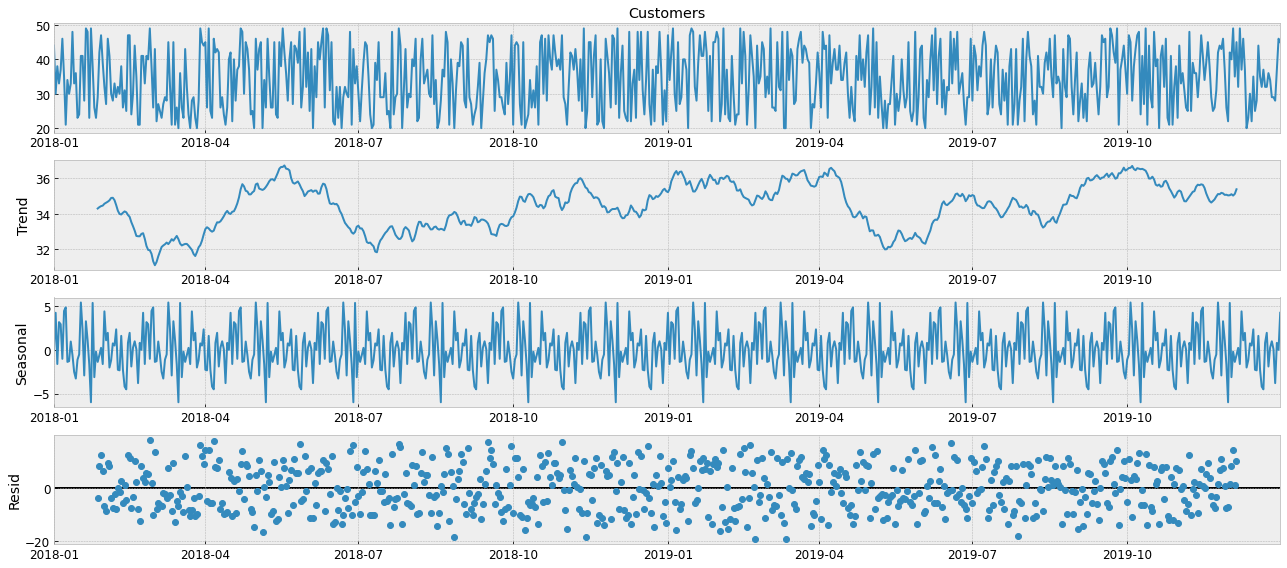

In [29]:
dec = sm.tsa.seasonal_decompose(data['Customers'],period = 52).plot()
plt.show()


In [30]:
model = SARIMAX(train.Customers, order=(1, 1, 0), seasonal_order=(1, 0, 0,12))
model_fit = model.fit(disp=False)
predictions = round(model_fit.predict(start=1, end=len(test), dynamic=False))
predictions2 = round(model_fit.predict(start=1, end=len(train), dynamic=False))
   


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RMSE train: 6.085814888504485
RMSE of test: 8.189424074174365


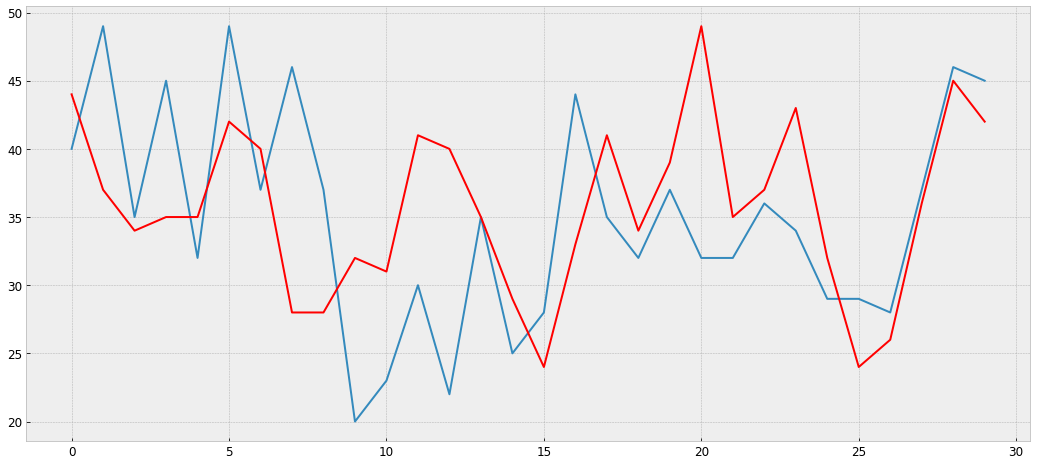

In [31]:
plt.plot(test.Customers.values , label='Original')
plt.plot(predictions.values,color='red',label='AutoSARIMA {0}'.format(order))
from sklearn.metrics import mean_squared_error
from math import sqrt
print('RMSE train:',np.sqrt(mean_squared_error((train.Customers),predictions2)))

print('RMSE of test:',np.sqrt(mean_squared_error((test.Customers),predictions)))



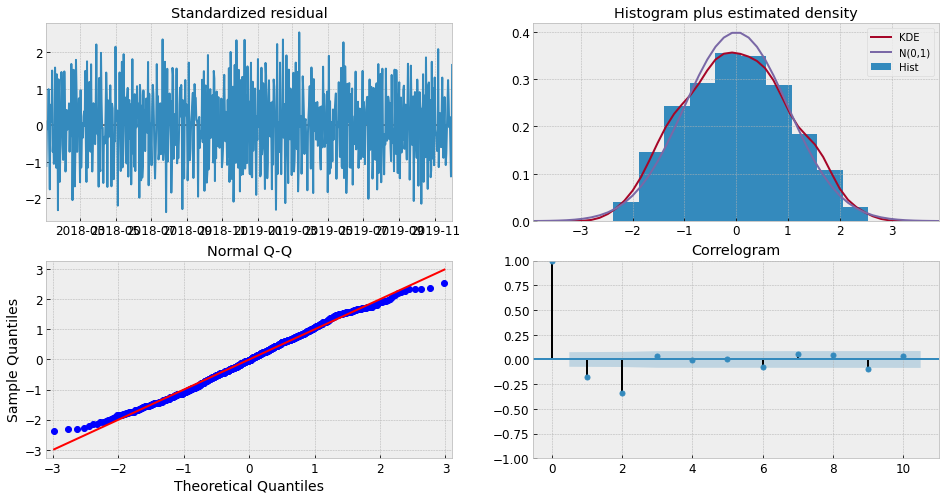

In [32]:
model_fit.plot_diagnostics(figsize = (16, 8))
plt.show()